# PowerGIM stochastic optimisation - example Doggerbank

## Environment

In [3]:
%matplotlib inline

In [1]:
# this is for the Pyomo/PySP "runef" and "runph" commands to be found:
!set PATH=C:\Anaconda3;C:\Anaconda3\Scripts;%PATH%

The main input file:

In [1]:
!more sto_doggerbank.py

# -*- coding: utf-8 -*-
"""
Created on Tue Aug  9 12:51:18 2016

@author: hsven
"""

"""
INSTRUCTIONS:
1. Run the command line sto_runme.bat file (which invokes this script)
2. Once completed (20 hours?), run this script directly to produce .kml 
   output files (reading from the ph.csv file)
3. Copy/rename the ph.csv result file so it is not overwritten
   by the next case study.

Specify which case to investigate below:
"""
caseID = 4

import powergama
import powergama.powergim as pgim
import powergama.GIS
import numpy.random as rnd
import math

sampling = 'kmeans'
samplesize = 100 #50
rnd.seed(2016) #fixed seed  to be able to recreate results - debugging
res_file='ef.csv'

if caseID==1:
    scenario_numberof=4
    scenario_probability = [0.25,0.25,0.25,0.25]
elif caseID==2:
    scenario_numberof=4
    scenario_probability = [0.25,0.25,0.25,0.25]
elif caseID==3:
    scenario_numberof=3
    scenario_probability = [0.334,0.333,0.333]
elif caseID==4:
    scenario_numberof=3
    scenario

## Solve problem
The next line runs the optimisation (via command-line), and may take some time (minutes/hours? - 1194 sec on my computer)

In [4]:
!runef -m sto_doggerbank.py  --solve --solver=gurobi --solution-writer=pyomo.pysp.plugins.csvsolutionwriter

Module=pyomo.pysp.plugins.csvsolutionwriter is already imported - skipping
Importing module=C:/Users/hsven/Documents/python/powergama/powergama/examples/powergim_doggerbank/sto_doggerbank.py
Module successfully loaded
Creating scenario tree model
Done scenario tree model.
Creating model instance (case 4), scenario=Scenario3
Creating model instance (case 4), scenario=Scenario2
Creating model instance (case 4), scenario=Scenario1

Initializing extensive form algorithm for stochastic programming problems.
EF solve completed and solution status is optimal
EF solve termination condition is optimal
EF objective: 783950723877.16101
EF gap:            0.00000
EF bound:     783950723877.16101

Extensive form solution:
----------------------------------------------------
Tree Nodes:

	Name=Scenario1
	Stage=Stage2
	Parent=root
	Variables: 
		branchFlow12_1[0,0]=3600.0
		branchFlow12_1[0,1]=3600.0
		branchFlow12_1[0,2]=1919.82730701
		branchFlow12_1[0,3]=628.058601917
		branchFlow12_1[0,4]=3600.0


## Investigate solution

In [4]:
# this will also run code inside __main__
%run -i sto_doggerbank.py

{(2, 'invest'): 0.0, (1, 'invest'): 9066191445.6792812, (1, 'op'): 0.0, (2, 'op'): 0.0}
Scenario 1
{(2, 'invest'): 2632058876.7881007, (1, 'invest'): 9066191445.6792812, (1, 'op'): 0.0, (2, 'op'): 771462301571.01379}
Scenario 2
{(2, 'invest'): 2510877982.0756426, (1, 'invest'): 9066191445.6792812, (1, 'op'): 0.0, (2, 'op'): 772634639855.82422}
Scenario 3
{(2, 'invest'): 2383883703.3151336, (1, 'invest'): 9066191445.6792812, (1, 'op'): 0.0, (2, 'op'): 773820007243.09863}


In [5]:
print("case ID = {}".format(caseID))

case ID = 4


In [6]:
pgres=powergama.Results(grid_res,databasefile=None,sip=True)

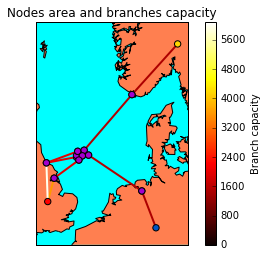

In [9]:
pgres.plotMapGrid(nodetype='area',branchtype='capacity')

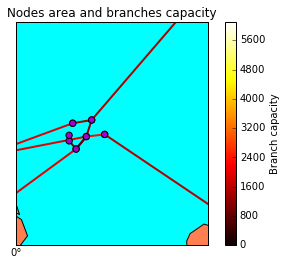

In [10]:
pgres.plotMapGrid(nodetype='area',branchtype='capacity', latlon=[53,0,57,6],draw_par_mer=True) 